In [1]:
import pandas as pd

**Loading chapter wise master saved in supervised-ML**

In [2]:
df = pd.read_csv("Supervised_ML_Master/Para_Wise_M_L-Model_OF_NOBEL_QURAN.csv", header = None, encoding = "ISO-8859-1")
df.drop([0],axis=0,inplace=True)
df = pd.DataFrame(df).rename(columns = {0:"Surah",1:'Ayat',2:'Para',3:'Data'})
#Data preview
df.head(10)

,Surah,Ayat,Para,Data
1,1,1,1,In the name of Allah Most Gracious Most Merciful.
2,1,2,1,Praise be to Allah the Cherisher and Sustainer...
3,1,3,1,Most Gracious Most Merciful;
4,1,4,1,Master of the Day of Judgment.
5,1,5,1,Thee do we worship and Thine aid we seek.
6,1,6,1,Show us the straight way
7,1,7,1,The way of those on whom Thou hast bestowed Th...
8,2,1,1,A.L.M.
9,2,2,1,This is the Book; in it is guidance sure witho...
10,2,3,1,Who believe in the Unseen are steadfast in pra...


In [3]:
surahs = df['Surah'].unique().tolist()

Surah_Data = []
for surah in surahs:
    Data = ''
    for val in df[df["Surah"] == surah]['Data']:
        Data += val
    Surah_Data.append(Data)
Surahs_df = pd.DataFrame({'Data':Surah_Data}).reset_index().rename(columns = {'index':"Surah"})
Surahs_df.head()

,Surah,Data
0,0,In the name of Allah Most Gracious Most Mercif...
1,1,A.L.M.This is the Book; in it is guidance sure...
2,2,A. L. M.Allah! There is no god but He#NAME? th...
3,3,O mankind! reverence your Guardian-Lord who cr...
4,4,O ye who believe! fulfil (all) obligations. La...


**Natural language processing** 

In [4]:
Surahs_df["Data"]=Surahs_df["Data"].str.replace(';',' ')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('.',' ')
Surahs_df["Data"]=Surahs_df["Data"].str.replace(':','')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('(','')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('"','')
Surahs_df["Data"]=Surahs_df["Data"].str.replace(')','')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('-','')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('Qur´an','Quran')
Surahs_df["Data"]=Surahs_df["Data"].str.replace('Allah´s',"Allah's")
Surahs_df["Data"]=Surahs_df["Data"].str.replace('Isma´il',"Ismail")
Surahs_df["Data"]=Surahs_df["Data"].str.replace('Shu´aib',"Shuaib")
Surahs_df["Data"]=Surahs_df["Data"].str.replace('´partners´',"partners")

c:\users\the laptop store\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
c:\users\the laptop store\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
c:\users\the laptop store\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [5]:
#Saving Surah wise_Master
Surahs_df.to_csv("Unsupervised_ML-Deep_learning_Master/Surah_Wise_Deep_Learning-Model_OF_NOBEL_QURAN.csv",header=None, index=False)

In [5]:
#to read save file
dfs = pd.read_csv("Unsupervised_ML-Deep_learning_Master/Surah_Wise_Deep_Learning-Model_OF_NOBEL_QURAN.csv", header = None, encoding = "ISO-8859-1")
dfs = pd.DataFrame(dfs).rename(columns = {0:"Surah",1:'Data'})
dfs.head()


,Surah,Data
0,0,In the name of Allah Most Gracious Most Mercif...
1,1,A L M This is the Book in it is guidance sure...
2,2,A L M Allah! There is no god but He#NAME? th...
3,3,O mankind! reverence your GuardianLord who cre...
4,4,O ye who believe! fulfil all obligations Lawf...


In [6]:
# here's several helpful packages to load
#first install these by e.g !pip install nltk
                          # !pip install numpy 

import numpy as np # linear algebra
import pandas as pd # data processing,
import nltk # natural language processing toolkit
import string
from wordcloud import WordCloud #for making word cloud
import matplotlib.pyplot as plt #for visualizing 
from collections import Counter

In [7]:
nltk.download("stopwords")
nltk.download("punkt")
#Create Stop Words Corpus
stop_words = nltk.corpus.stopwords.words("english") + list(string.punctuation) \
+ list(string.ascii_lowercase) + list(string.ascii_uppercase) + list(string.digits) \
+ list(['--']+["''"]+["``"]+[".."]+["..."]+["ii"]+["iii"]+["iv"]+["'s"]+["the"]+["however"] \
+ ["when"]+["as"]+["meanwhile"]+['eventually'])

[nltk_data] Downloading package stopwords to C:\Users\The Laptop
[nltk_data]     store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\The Laptop
[nltk_data]     store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#stop_words

[('allah', 2805), ('ye', 1988), ('lord', 931), ('say', 764), ('thou', 757), ('said', 708), ('shall', 629), ('thee', 604), ('one', 511), ('day', 504), ('people', 499), ('thy', 492), ('us', 463), ('believe', 459), ('name', 406), ('earth', 404), ('things', 364), ('men', 356), ('may', 340), ('signs', 331), ('sent', 320), ('truth', 315), ('indeed', 308), ('among', 303), ('verily', 298), ('hath', 296), ('made', 286), ('would', 283), ('fear', 269), ('good', 265), ('evil', 255), ('faith', 246), ('give', 243), ('come', 242), ('messenger', 241), ('see', 232), ('know', 220), ('penalty', 215), ('life', 207), ('turn', 202), ('man', 200), ('book', 197), ('heavens', 195), ('therein', 194), ('make', 191), ('back', 190), ('fire', 185), ('behold', 185), ('away', 184), ('power', 184)]


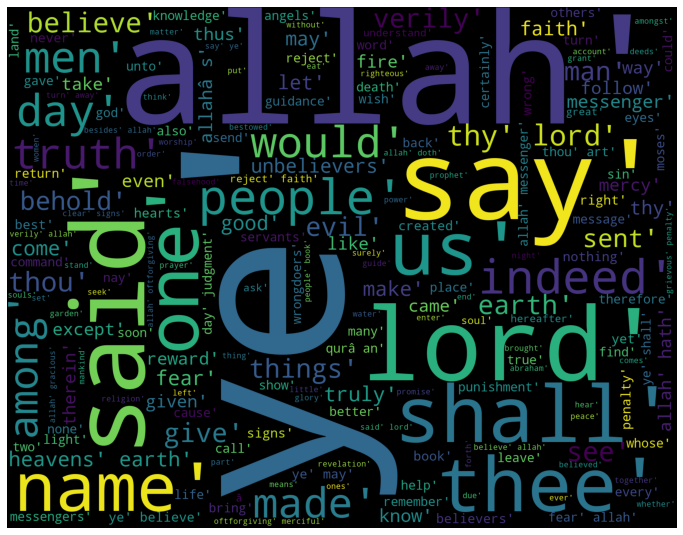

In [9]:
Surah = 1
Data = ''
for a in Surahs_df['Data']:
    Data += a
tokens = nltk.word_tokenize(Data)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [s.lower() for s in tokens]

hr1_filter = [w for w in lower_tokens if not w in stop_words]
#Count Words
hr1_counter = Counter(hr1_filter)
#Sort Words by counts
sorted_word_counts = sorted(list(hr1_counter.values()), reverse=True)
print(hr1_counter.most_common(50))
    
#Set Width & Height
width = 12
height = 12
#Initialize Plot
plt.figure(figsize=(width, height))
#Generate Wordplot
wordcloud = WordCloud(width=1800,height=1400).generate(str(hr1_filter))
plt.imshow(wordcloud)
plt.axis("off")
#Generate Plot
plt.show()

Surah: 1
Most Common Words [('allah', 2), ('gracious', 2), ('merciful', 2), ('name', 1), ('praise', 1), ('cherisher', 1), ('sustainer', 1), ('worlds', 1), ('master', 1), ('day', 1)]


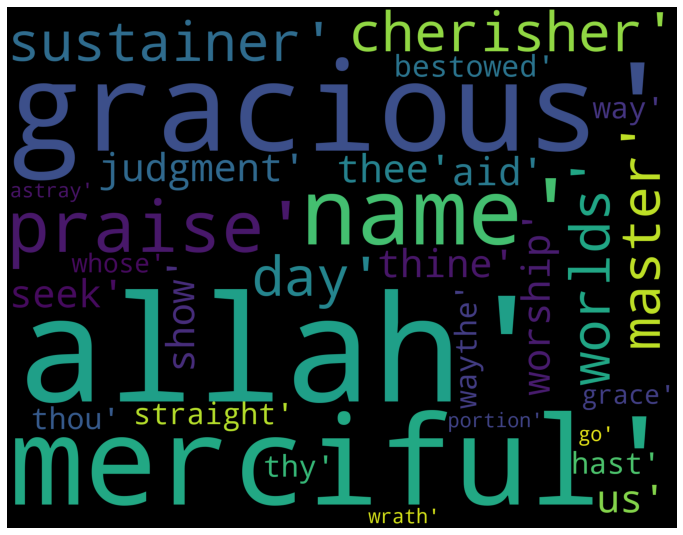


Surah: 2
Most Common Words [('allah', 262), ('ye', 214), ('shall', 69), ('said', 65), ('say', 51), ('lord', 50), ('believe', 49), ('faith', 48), ('people', 40), ('one', 38)]


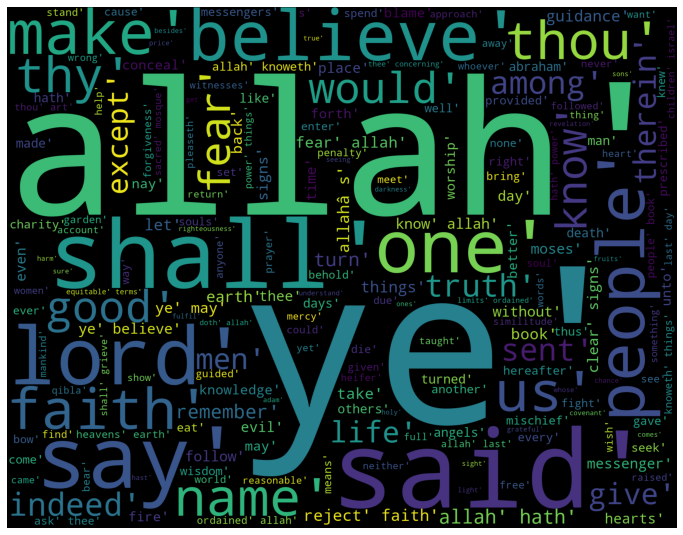


Surah: 3
Most Common Words [('allah', 200), ('ye', 109), ('say', 40), ('lord', 39), ('thou', 38), ('faith', 33), ('book', 31), ('shall', 28), ('thee', 26), ('believe', 26)]


KeyboardInterrupt: 

<Figure size 864x864 with 0 Axes>

In [17]:
Surah = 1
for a in Surahs_df['Data']:
    HR1_token = nltk.word_tokenize(a.lower())
    hr1_filter = [w for w in HR1_token if not w in stop_words]
    #Count Words
    hr1_counter = Counter(hr1_filter)
    #Sort Words by counts
    sorted_word_counts = sorted(list(hr1_counter.values()), reverse=True)
    print("Surah: {}".format(Surah))
    print("Most Common Words",hr1_counter.most_common(10))
    
    
    #Set Width & Height0
    width = 12
    height = 12
    #Initialize Plot
    plt.figure(figsize=(width, height))
    #Generate Wordplot
    wordcloud = WordCloud(width=1800,height=1400).generate(str(hr1_filter))
    #Show Plot
    plt.imshow(wordcloud)
    plt.axis("off")
    #Generate Plot
    plt.show()
    print("============================\n============================\n")
    Surah += 1

**Linguistic Analysis**

In [10]:
#spaCy best python library for natural language processing
import spacy
nlp = spacy.load("en_core_web_sm") # english model

In [11]:
#linguistic Analysis=("place_desire_verses")
text=("In the name of Allah, the Beneficent, the Merciful.Praise be to Allah, Lord of the Worlds,The Beneficent, the Merciful.Master of the Day of Judgment,Thee [alone] we worship; Thee [alone] we ask for help.Show us the straight path,The path of those whom Thou hast favoured; Not the [path] of those who earnThine anger nor of those who go astray.")
text_combined = str(text)
doc= nlp(text_combined)

In [12]:
from spacy import displacy
sentence_spans = list(doc.sents)
displacy.render(doc, style="dep")

In [13]:
nlp2 = spacy.load("en_core_web_sm")

In [14]:
text2=("But His command, when He intendeth a thing, is only that He saith unto it:Be! and it is.Therefor Glory be to Him in Whose hand is the dominion over all things! UntoHim ye will be brought back.")
text_combined2 = str(text2)
doc2= nlp2(text_combined2)

In [15]:
from spacy import displacy
options = {"compact":True, "bg":"#009000", "color":"white","font":"Source Sans Pro"}
sentence_spans = list(doc2.sents)
html=displacy.render(doc2, style="dep",options=options,page=True)

In [16]:
nlp3 = spacy.load("en_core_web_sm")

In [74]:
text3=("")
text_combined3 = str(text3)
doc3= nlp3(text_combined3)

In [75]:
from spacy import displacy
options = {"compact":True, "bg":"#09a3d5", "color":"white","font":"Source Sans Pro"}
sentence_spans = list(doc3.sents)
html=displacy.render(doc3, style="dep",options=options,page=True)